In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import r2_score
%matplotlib inline


<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [4]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

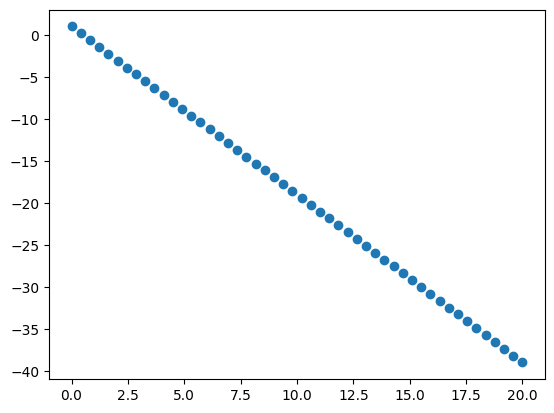

In [ ]:
plt.scatter(X, y);

In [ ]:
def GD_SingleVariable(X, y, alpha, max_num_iterations):
    theta_0, theta_1 = 0,0
    loss = []
    theta_0s = []
    theta_1s = []
    h_xs=[]
    m = len(y)

    for i in tqdm(range(max_num_iterations)):
        # print(f'****************** Iteration {i} ********************\n')

        theta_0s.append(theta_0)
        theta_1s.append(theta_1)

        h_x = theta_0+theta_1*X
        h_xs.append(h_x)
        # print('h(x) : ', h_x)

        error_vector = (h_x - y)
        # print('\nError Vector :\n', error_vector)

        MSE = np.sum(error_vector**2) / (2*m)
        loss.append(MSE)
        # print('\nj = ', MSE)

        d_theta_0 = (np.sum(h_x - y))/m
        d_theta_1 = (np.sum((h_x - y) *X))/m

        gradient_vector = np.array([d_theta_0, d_theta_1])
        # print('\nGradient Vector : \n', gradient_vector)

        gradient_vec_norm = np.linalg.norm(gradient_vector)
        # print('\n Gradient Vector Norm : ', gradient_vec_norm)

        if i>0:
            if gradient_vec_norm <=0.001 or (np.abs(loss[-1] - loss[-2])<=0.001):
                print('****************** Training Report ********************')
                print(f'Gradient Descent converged after {i} iterations')
                print('theta_0_Opt : ', theta_0)
                print('theta_1_Opt : ', theta_1)
                # print('\nError Vector :\n', error_vector)
                # print('Cost = ', MSE)
                # print('h(x) = y_predict: \n', h_x)
                # print('y_actual : ', y)

                break

        theta_0 = theta_0 - d_theta_0*alpha
        theta_1 = theta_1 - d_theta_1*alpha
        # print('theta_0_new : ', theta_0)
        # print('theta_1_new : ', theta_1)


    return theta_0, theta_1, loss, theta_0s, theta_1s, h_xs

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [ ]:
theta_0, theta_1, loss, theta_0s, theta_1s, h_xs = GD_SingleVariable(X, y, alpha=0.0005, max_num_iterations=300)

 25%|██▌       | 76/300 [00:00<00:00, 18495.34it/s]

****************** Training Report ********************
Gradient Descent converged after 76 iterations
theta_0_Opt :  -0.13068860511458022
theta_1_Opt :  -1.906559561423084


#### Calculate r2 score

In [ ]:
from sklearn.metrics import r2_score
h_x = theta_0 + theta_1*X
r2_score(h_x, y)

0.9972925180484754

#### Plot loss vs. epochs

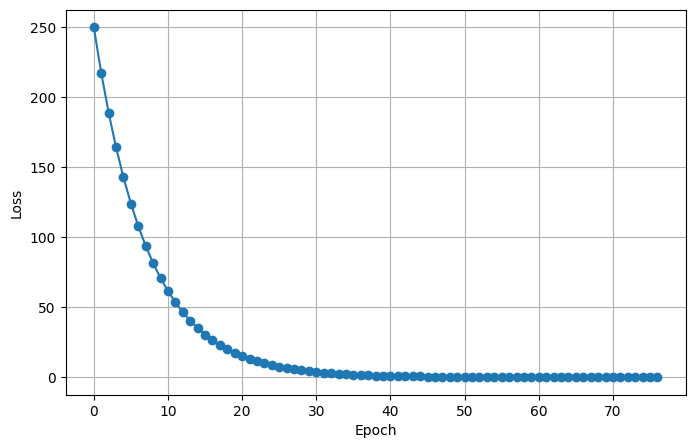

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(loss, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid('True');

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

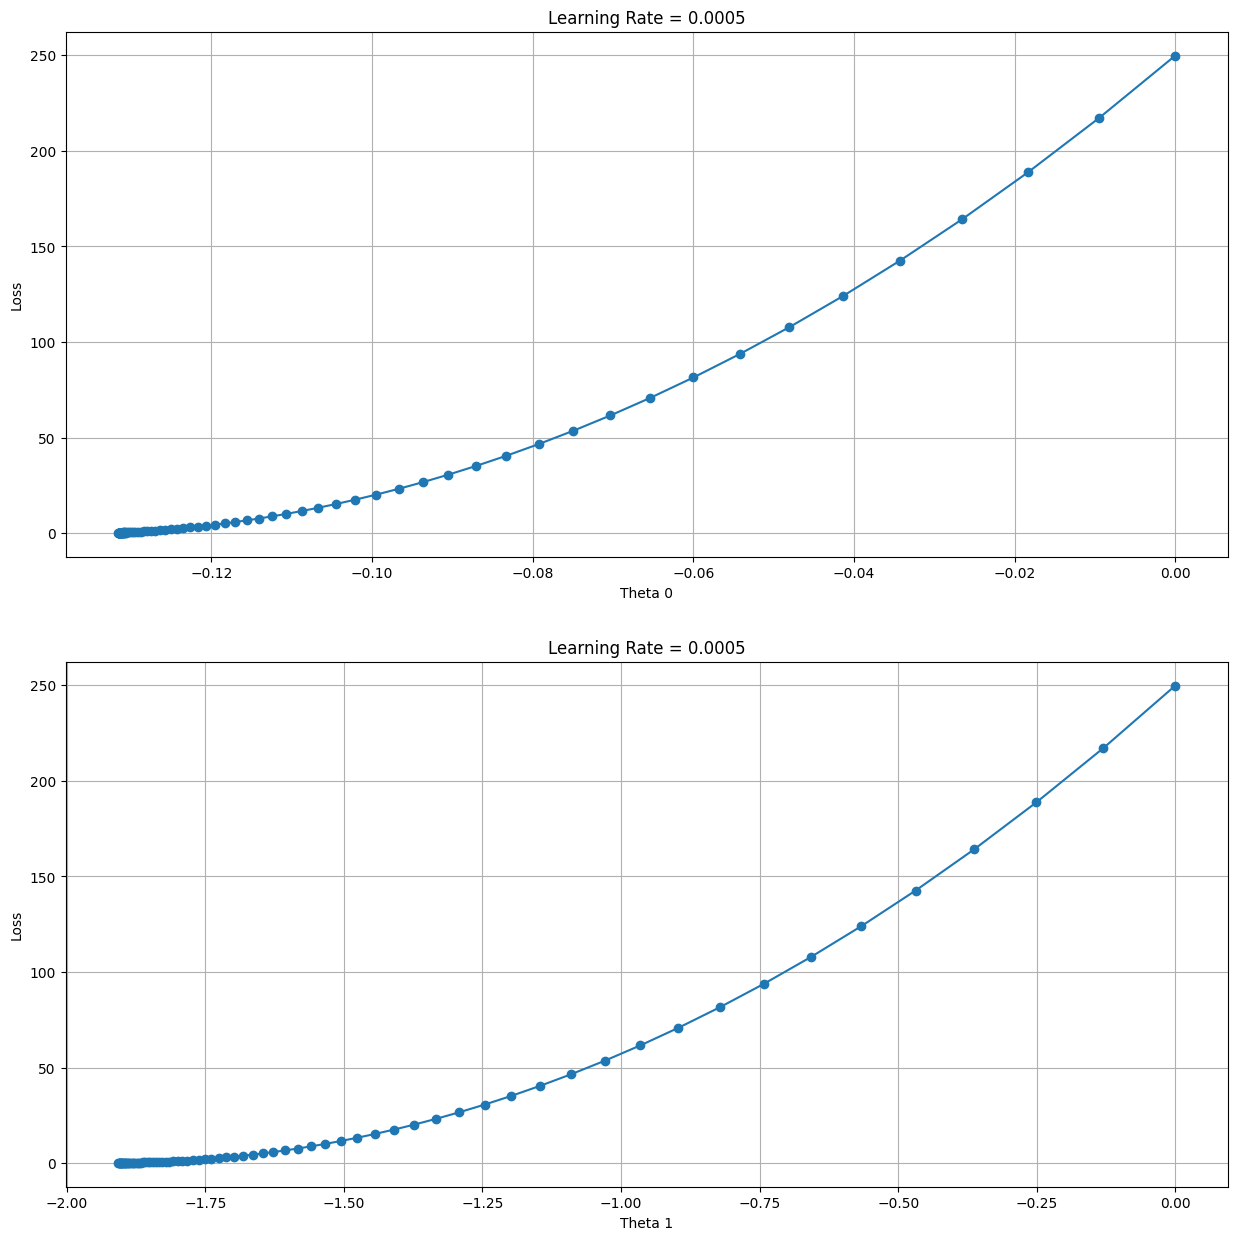

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(211)
plt.plot(theta_0s, loss, marker='o')
plt.xlabel('Theta 0',)
plt.ylabel('Loss')
plt.title('Learning Rate = 0.0005')
plt.grid('True')

plt.subplot(212)
plt.plot(theta_1s, loss, marker='o')
plt.xlabel('Theta 1',)
plt.ylabel('Loss')
plt.title('Learning Rate = 0.0005')
plt.grid('True')

#### Plot all regression lines till converge

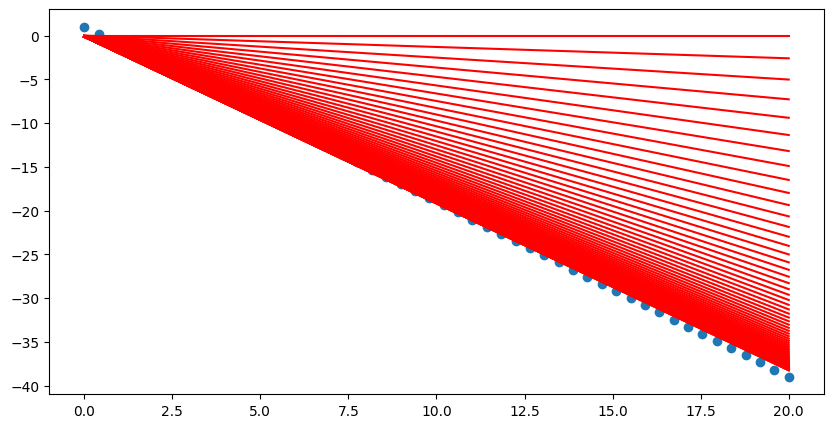

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X, y)
for hx in h_xs:
    plt.plot(X, hx, 'r')

#### Plot the best regression line

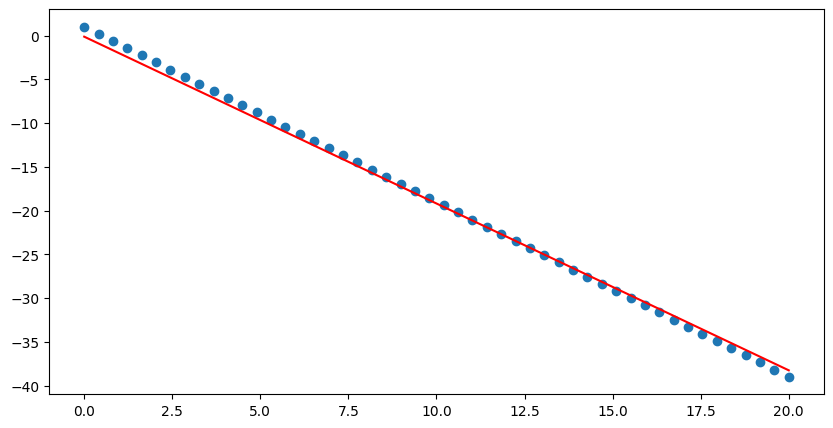

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(X, h_x, 'r');

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [ ]:
theta_0, theta_1, loss, theta_0s, theta_1s, h_xs = GD_SingleVariable(X, y, alpha=0.00005 , max_num_iterations=1000)

 60%|██████    | 600/1000 [00:00<00:00, 17653.79it/s]

****************** Training Report ********************
Gradient Descent converged after 600 iterations
theta_0_Opt :  -0.13128497509265505
theta_1_Opt :  -1.8831939332549636


In [ ]:
h_x = theta_0 + theta_1*X
r2_score(h_x, y)

0.9961418438853982

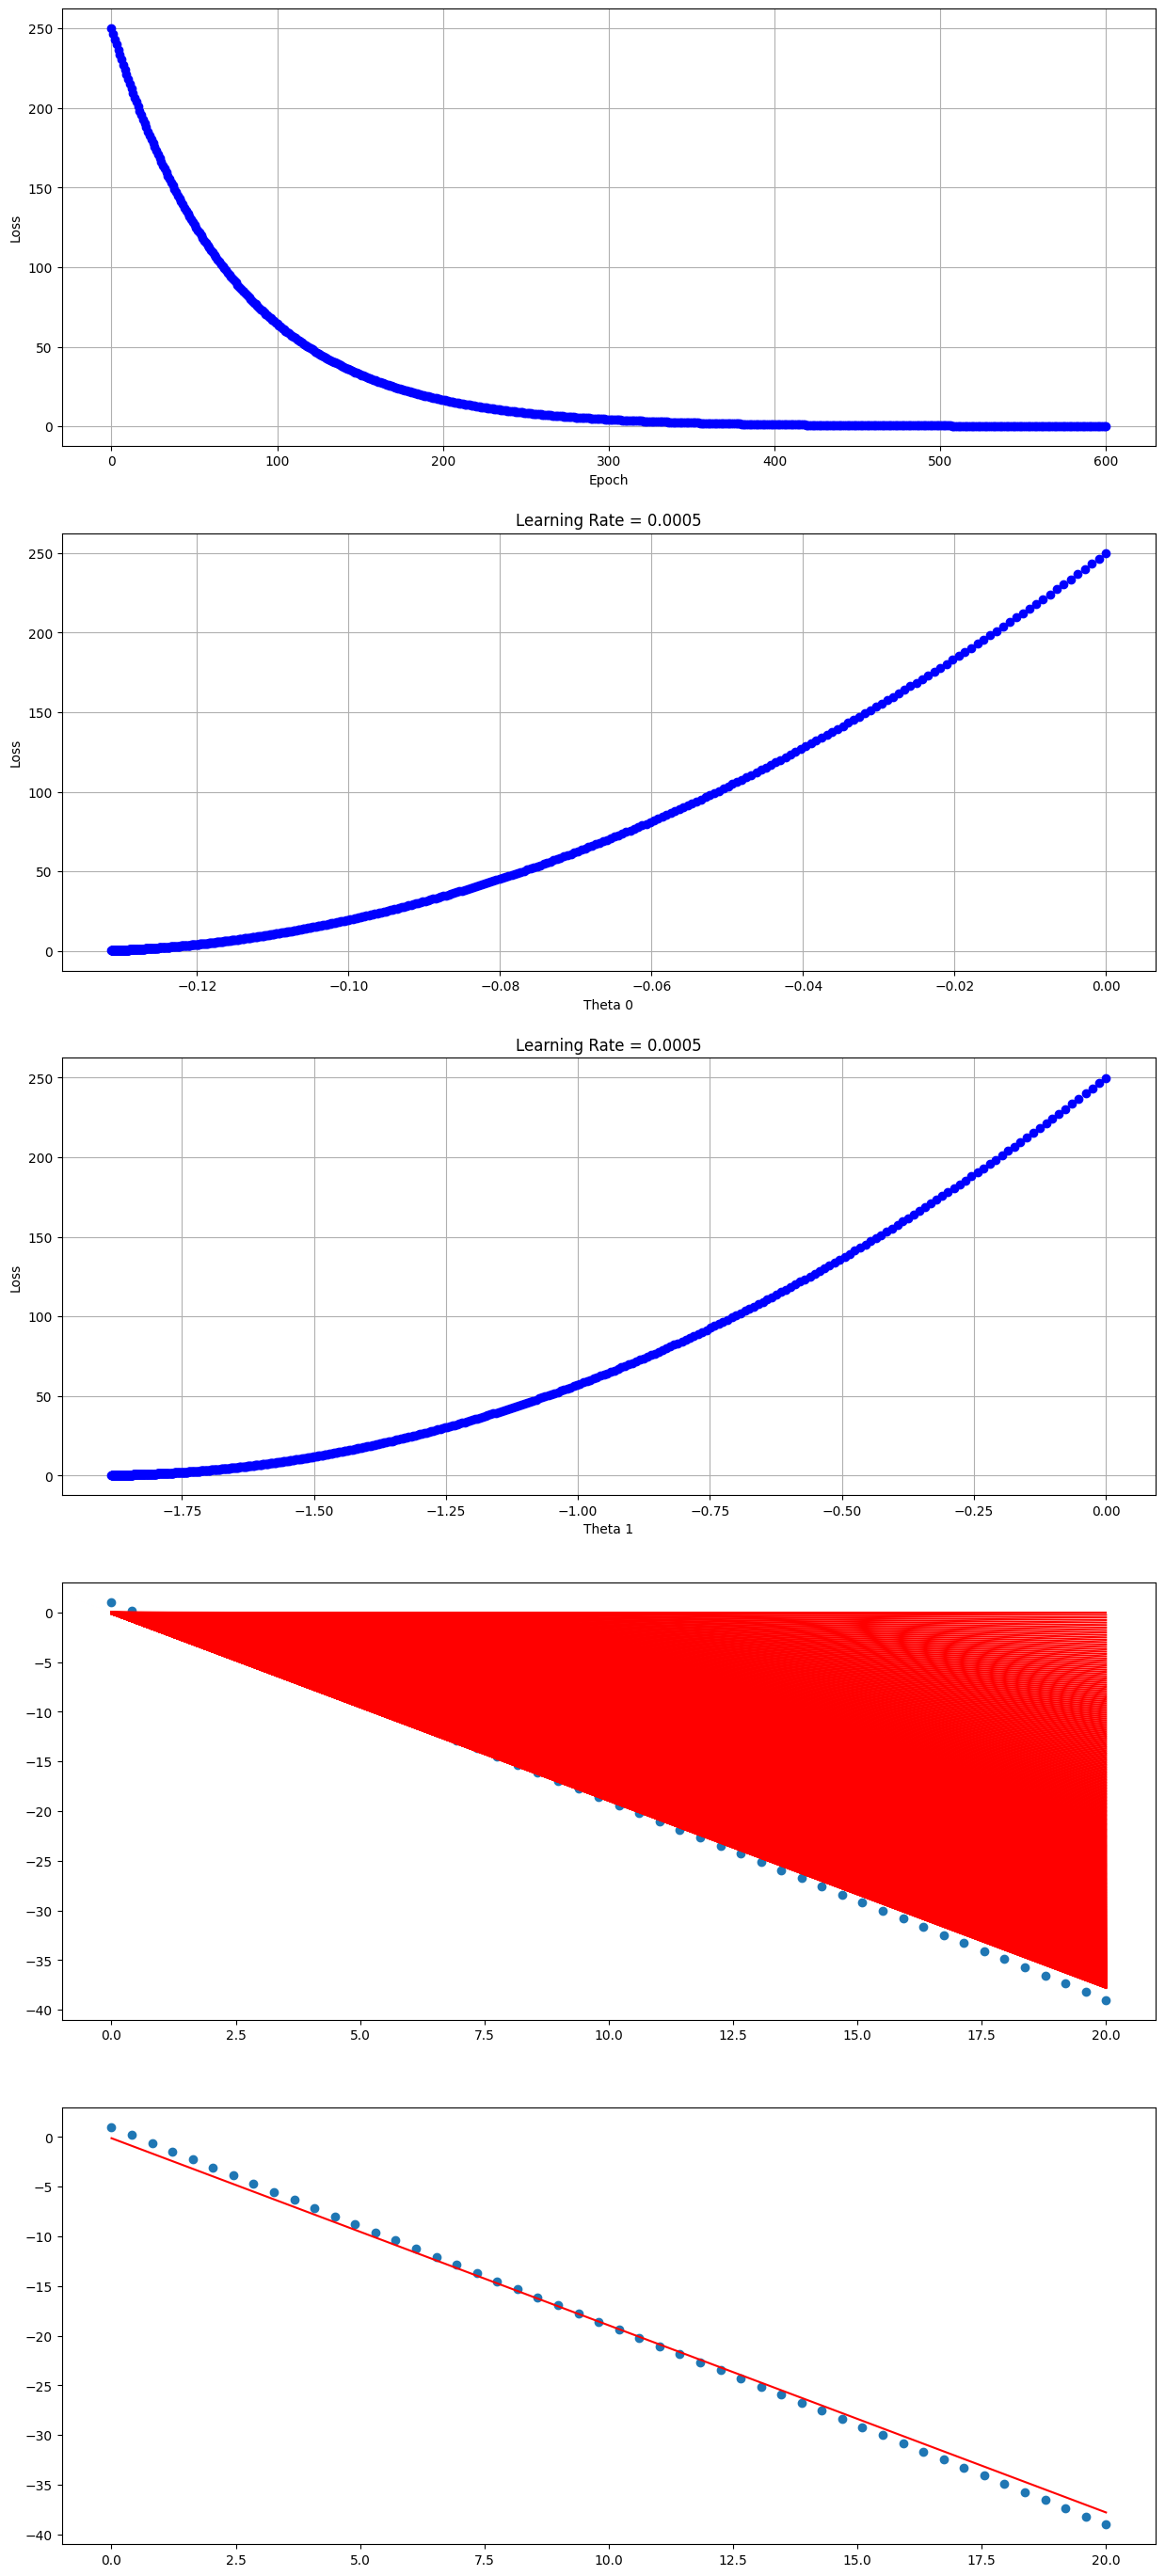

In [ ]:
plt.figure(figsize=(15,35))

plt.subplot(511)
plt.plot(loss, 'ob')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid('True');

plt.subplot(512)
plt.plot(theta_0s, loss, 'ob')
plt.xlabel('Theta 0',)
plt.ylabel('Loss')
plt.title('Learning Rate = 0.0005')
plt.grid('True')

plt.subplot(513)
plt.plot(theta_1s, loss, 'ob')
plt.xlabel('Theta 1',)
plt.ylabel('Loss')
plt.title('Learning Rate = 0.0005')
plt.grid('True')

plt.subplot(514)
plt.scatter(X, y)
for hx in h_xs:
    plt.plot(X, hx, 'r')

plt.subplot(515)
plt.scatter(X, y)
plt.plot(X, h_x, 'r');

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [ ]:
theta_0, theta_1, loss, theta_0s, theta_1s, h_xs = GD_SingleVariable(X, y, alpha=0.005 , max_num_iterations=300)

  2%|▏         | 7/300 [00:00<00:00, 997.83it/s]

****************** Training Report ********************
Gradient Descent converged after 7 iterations
theta_0_Opt :  -0.13219113407015481
theta_1_Opt :  -1.9150798063586691


In [ ]:
h_x = theta_0 + theta_1*X
r2_score(h_x, y)

0.9974043268951028

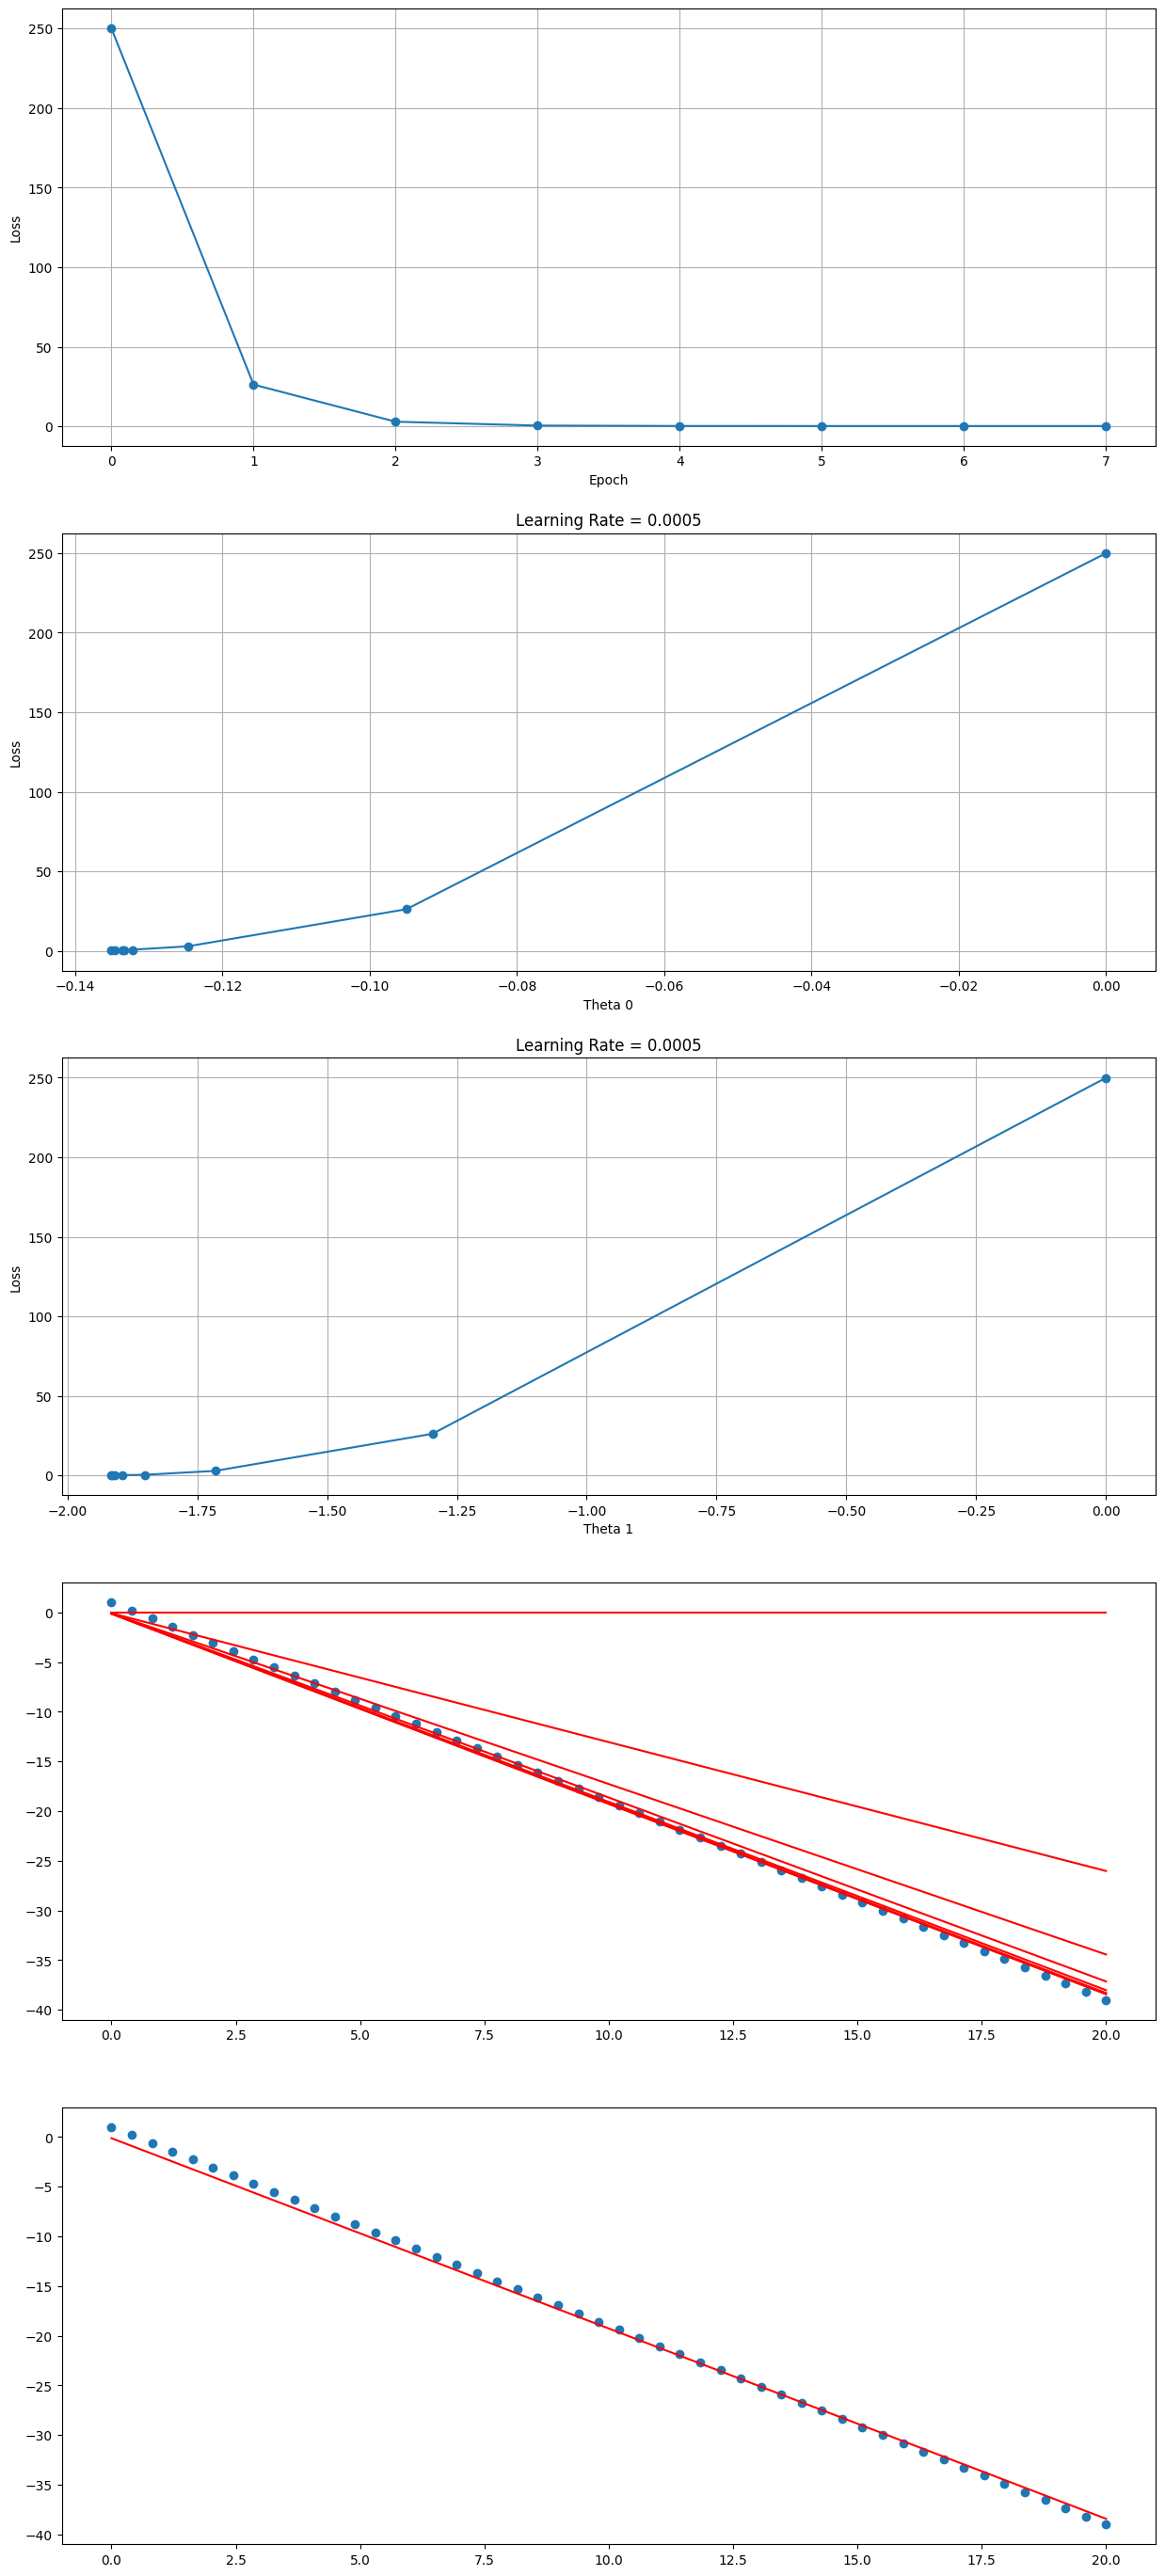

In [ ]:
plt.figure(figsize=(15,35))

plt.subplot(511)
plt.plot(loss, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid('True');

plt.subplot(512)
plt.plot(theta_0s, loss, marker='o')
plt.xlabel('Theta 0',)
plt.ylabel('Loss')
plt.title('Learning Rate = 0.0005')
plt.grid('True')

plt.subplot(513)
plt.plot(theta_1s, loss, marker='o')
plt.xlabel('Theta 1',)
plt.ylabel('Loss')
plt.title('Learning Rate = 0.0005')
plt.grid('True')

plt.subplot(514)
plt.scatter(X, y)
for hx in h_xs:
    plt.plot(X, hx, 'r')

plt.subplot(515)
plt.scatter(X, y)
plt.plot(X, h_x, 'r');

## Stochastic GD

In [ ]:
random_state = np.random.RandomState(seed=42)
random_state.shuffle(X)

a=-2
b=1

y=a*X+b

In [ ]:
def SGD_SingleVariable(X, y, alpha, epochs):
    theta_0, theta_1 = 0,0
    m = len(y)

    losses , thetas_0, thetas_1 = [], [], []
    for epoch in tqdm(range(epochs)):
        # print(f'****************** Epoch {epoch} ********************\n')

        for i in range(m):
            thetas_0.append(theta_0)
            thetas_1.append(theta_1)

            h_x = theta_0+theta_1*X[i]
            error_vector = (h_x - y[i])

            MSE = error_vector**2 / (2)

            d_theta_0 = h_x - y[i]
            d_theta_1 = (h_x - y[i]) *X[i]

            theta_0 = theta_0 - d_theta_0*alpha
            theta_1 = theta_1 - d_theta_1*alpha

            losses.append(MSE)

        gradient_vector = np.array([d_theta_0, d_theta_1])
        gradient_vec_norm = np.linalg.norm(gradient_vector)
        if epoch>0:
            if (gradient_vec_norm <=0.001 )or (np.abs(losses[-1] - losses[-m])<=0.001):
                print('****************** Training Report ********************\n')

                print(f'Gradient Descent converged after {epoch} epochs')
                print('\ntheta_0_opt : ', theta_0)
                print('theta_1_opt : ', theta_1)
                print('Cost = ', MSE)
                break

        # print('Cost = ', MSE)
        # print('\nGradient Vector : \n', gradient_vector)
        # print('\nGradient Vector Norm : \n', gradient_vec_norm)
        # print('\ntheta_0_new : ', theta_0)
        # print('theta_1_new : ', theta_1)


    return losses , thetas_0, thetas_1

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [ ]:
losses , thetas_0, thetas_1 = SGD_SingleVariable(X, y, 0.0005, 300)

100%|██████████| 300/300 [00:00<00:00, 5674.65it/s]


In [ ]:
h_x = thetas_0[-1]+thetas_1[-1]*X
r2_score(h_x, y)

0.999950120821058

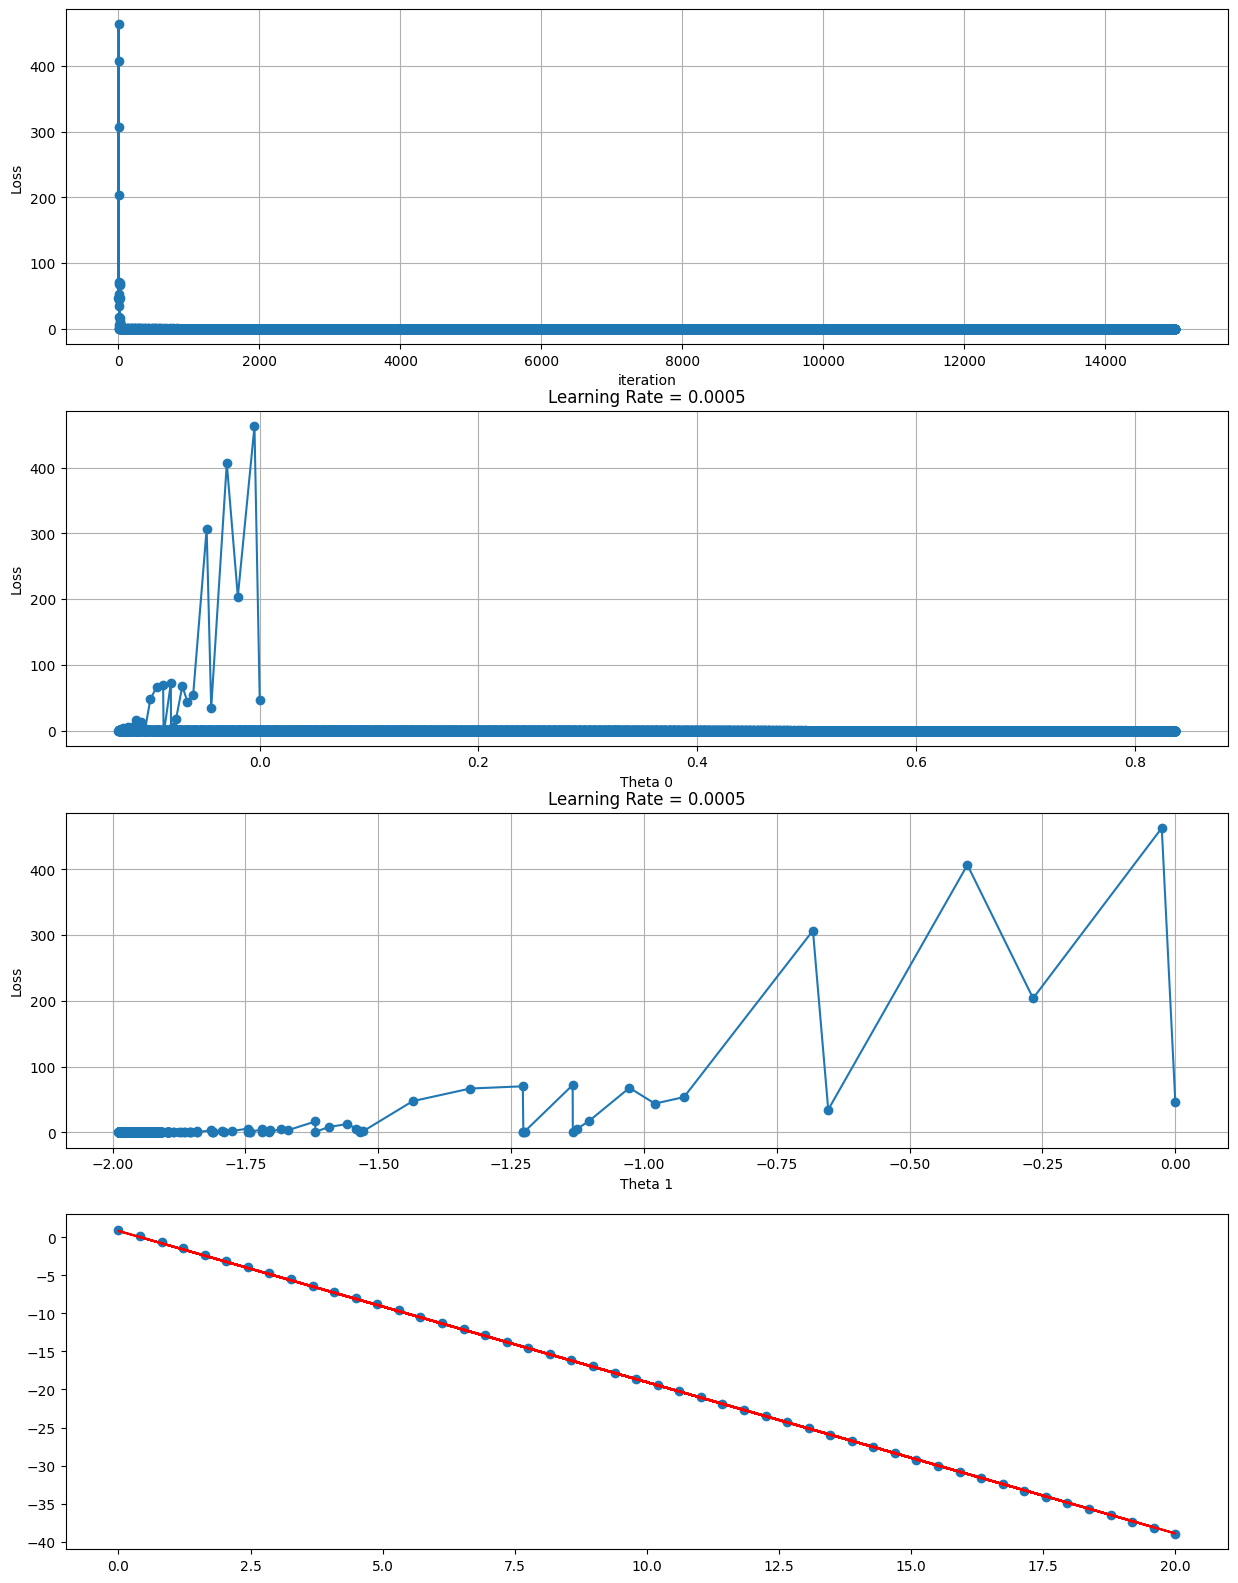

In [ ]:
plt.figure(figsize=(15,20))

plt.subplot(411)
plt.plot(losses, marker='o')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.grid('True');

plt.subplot(412)
plt.plot(thetas_0, losses, marker='o')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Learning Rate = 0.0005')
plt.grid('True')

plt.subplot(413)
plt.plot(thetas_1, losses, marker='o')
plt.xlabel('Theta 1',)
plt.ylabel('Loss')
plt.title('Learning Rate = 0.0005')
plt.grid('True')

plt.subplot(414)
plt.scatter(X, y)
plt.plot(X, h_x, 'r');

In [ ]:
theta_0s[-1], theta_1s[-1]

(-0.13219113407015481, -1.9150798063586691)

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [ ]:
losses , thetas_0, thetas_1 = SGD_SingleVariable(X, y, 0.0001, 300)

100%|██████████| 300/300 [00:00<00:00, 13540.20it/s]


In [ ]:
h_x = thetas_0[-1]+thetas_1[-1]*X
r2_score(h_x, y)

0.9988123839774435

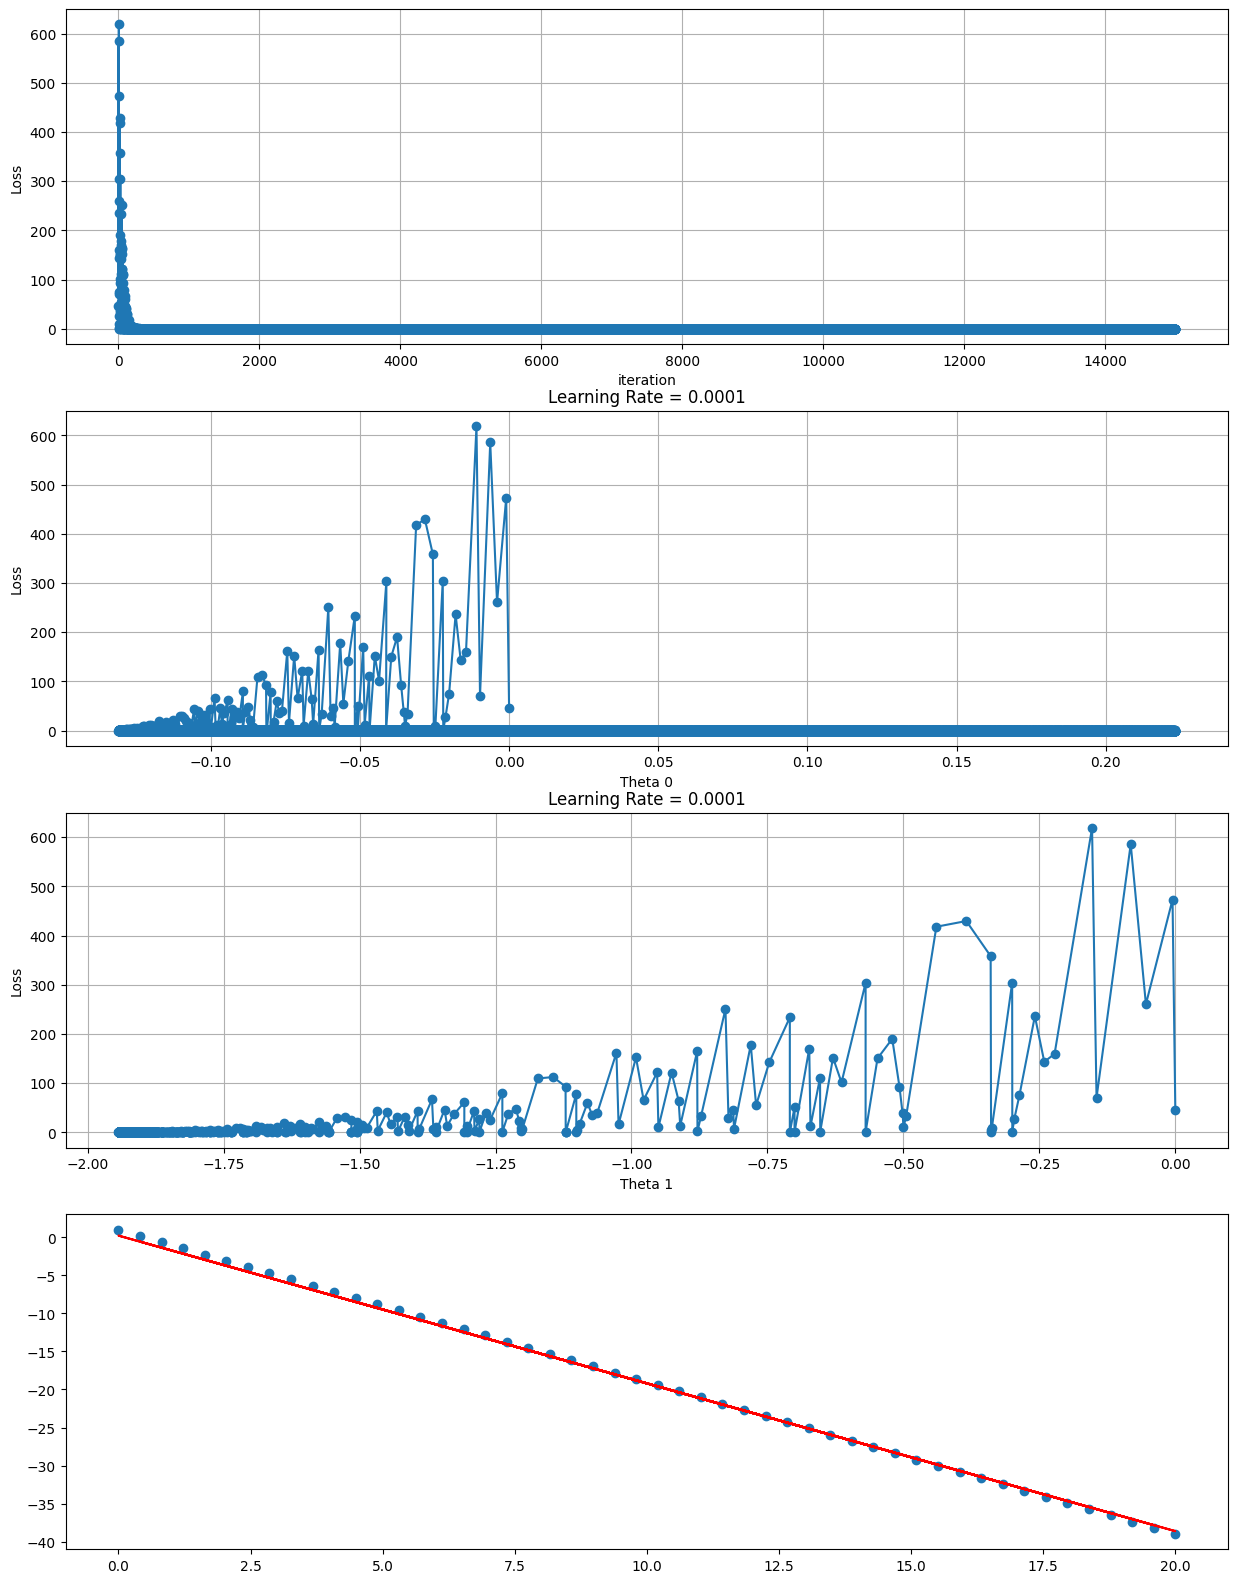

In [ ]:
plt.figure(figsize=(15,20))

plt.subplot(411)
plt.plot(losses, marker='o')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.grid('True');

plt.subplot(412)
plt.plot(thetas_0, losses, marker='o')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Learning Rate = 0.0001')
plt.grid('True')

plt.subplot(413)
plt.plot(thetas_1, losses, marker='o')
plt.xlabel('Theta 1',)
plt.ylabel('Loss')
plt.title('Learning Rate = 0.0001')
plt.grid('True')

plt.subplot(414)
plt.scatter(X, y)
plt.plot(X, h_x, 'r');

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [ ]:
losses , thetas_0, thetas_1 = SGD_SingleVariable(X, y, 0.00007, 300)

100%|██████████| 300/300 [00:00<00:00, 8800.65it/s]


In [ ]:
h_x = thetas_0[-1]+thetas_1[-1]*X
r2_score(h_x, y)

0.99849141206837

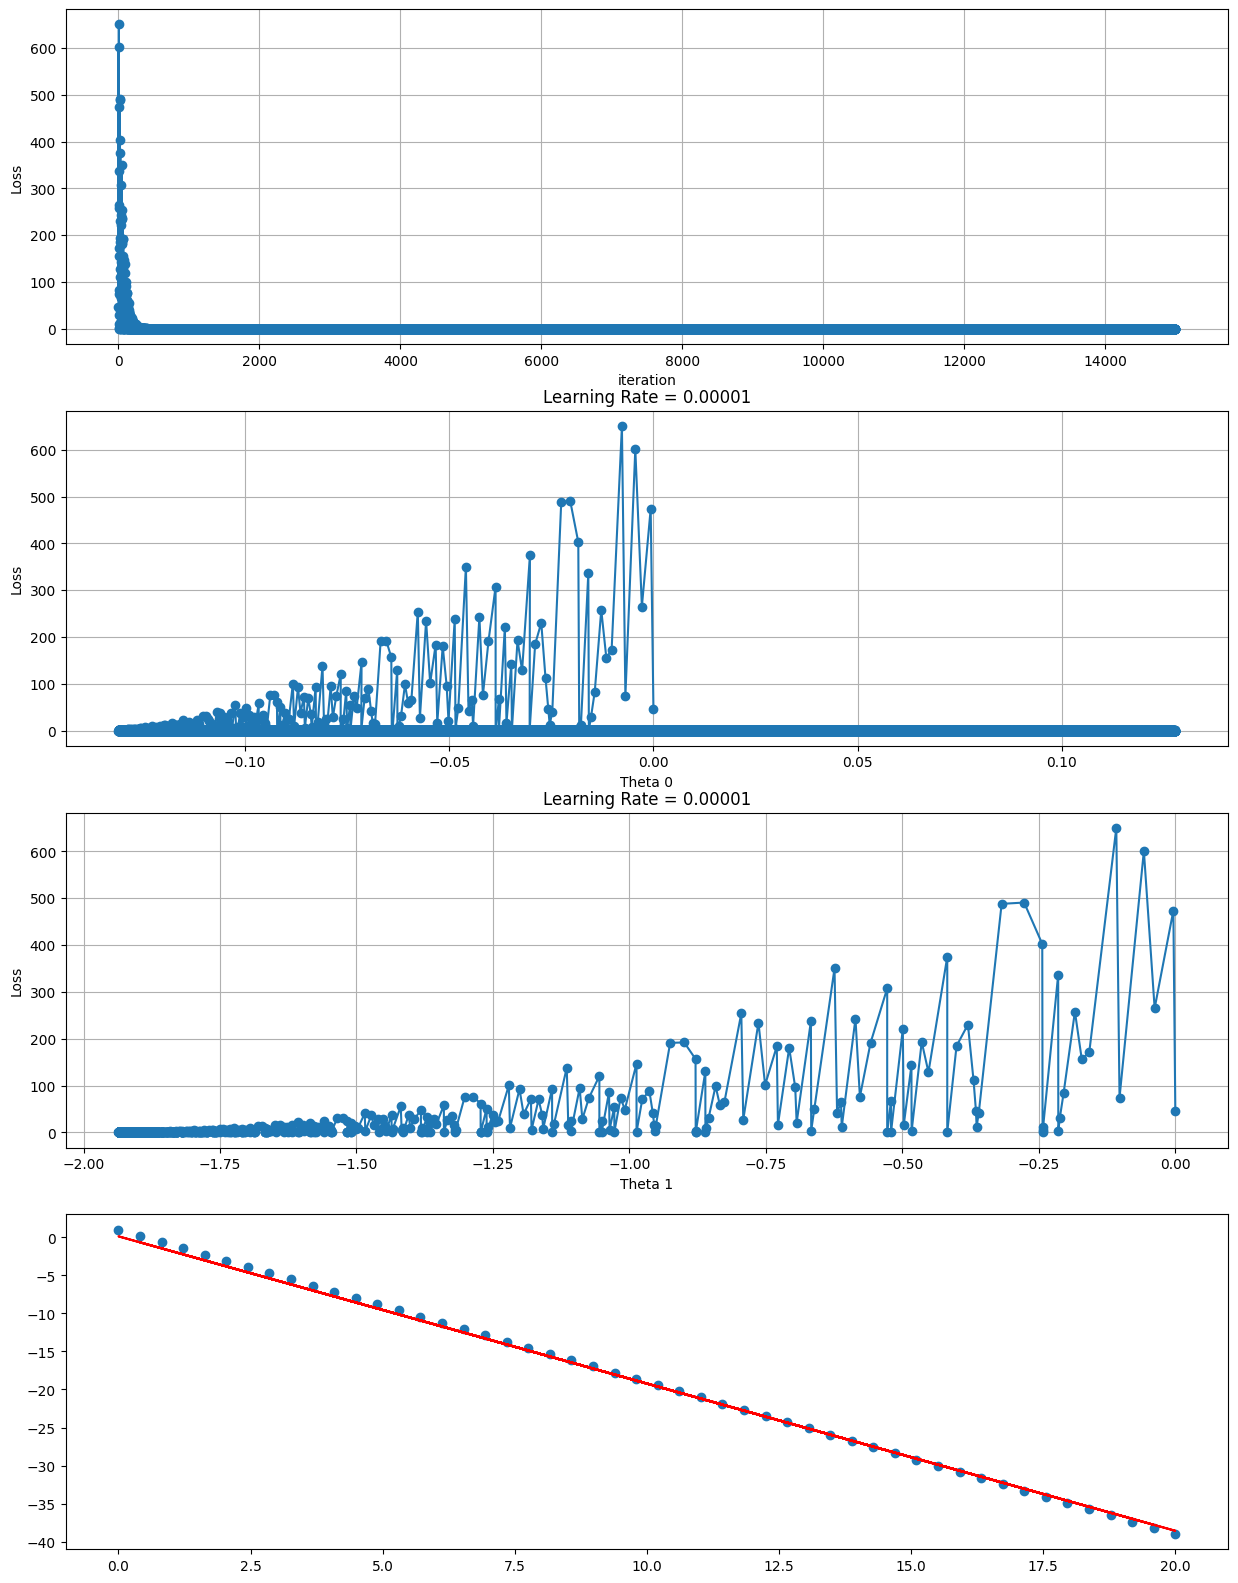

In [ ]:
plt.figure(figsize=(15,20))

plt.subplot(411)
plt.plot(losses, marker='o')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.grid('True');

plt.subplot(412)
plt.plot(thetas_0, losses, marker='o')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Learning Rate = 0.00001')
plt.grid('True')

plt.subplot(413)
plt.plot(thetas_1, losses, marker='o')
plt.xlabel('Theta 1',)
plt.ylabel('Loss')
plt.title('Learning Rate = 0.00001')
plt.grid('True')

plt.subplot(414)
plt.scatter(X, y)
plt.plot(X, h_x, 'r');

## Mini-Batch GD

In [6]:
def Mini_Batch_GD_SingleVariable(X, y, alpha, epochs, batch_size):
    theta_0, theta_1 = 0,0
    m = len(y)

    losses , thetas_0, thetas_1 = [], [], []
    for epoch in tqdm(range(epochs)):
        # print(f'****************** Epoch {epoch} ********************\n')

        for i in range(0, m, batch_size):
            thetas_0.append(theta_0)
            thetas_1.append(theta_1)

            h_x = theta_0+theta_1*X[i:i+batch_size]
            error_vector = (h_x - y[i:i+batch_size])

            MSE = sum(error_vector**2) / (2)*batch_size

            d_theta_0 = sum(h_x - y[i:i+batch_size])/batch_size
            d_theta_1 = sum((h_x - y[i:i+batch_size]) *X[i:i+batch_size]) / batch_size

            theta_0 = theta_0 - d_theta_0*alpha
            theta_1 = theta_1 - d_theta_1*alpha

            losses.append(MSE)

        if epoch==0:
            num = len(losses)

        gradient_vector = np.array([d_theta_0, d_theta_1])
        gradient_vec_norm = np.linalg.norm(gradient_vector)
        if epoch>0:
            if (gradient_vec_norm <=0.001 )or (np.abs(losses[-1] - losses[len(losses)-num])<=0.001):
                print('****************** Training Report ********************\n')

                print(f'Gradient Descent converged after {epoch} epochs')
                print('\ntheta_0_opt : ', theta_0)
                print('theta_1_opt : ', theta_1)
                print('Cost = ', MSE)
                break

        # print('Cost = ', MSE)
        # print('\nGradient Vector : \n', gradient_vector)
        # print('\nGradient Vector Norm : \n', gradient_vec_norm)
        # print('\ntheta_0_new : ', theta_0)
        # print('theta_1_new : ', theta_1)


    return losses , thetas_0, thetas_1

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [7]:
losses , thetas_0, thetas_1 = Mini_Batch_GD_SingleVariable(X, y, alpha=0.0005, epochs=300, batch_size=5)

100%|██████████| 300/300 [00:00<00:00, 1904.92it/s]


In [11]:
h_x = thetas_0[-1] + thetas_1[-1]*X
r2_score(h_x, y)

0.9987996091171737

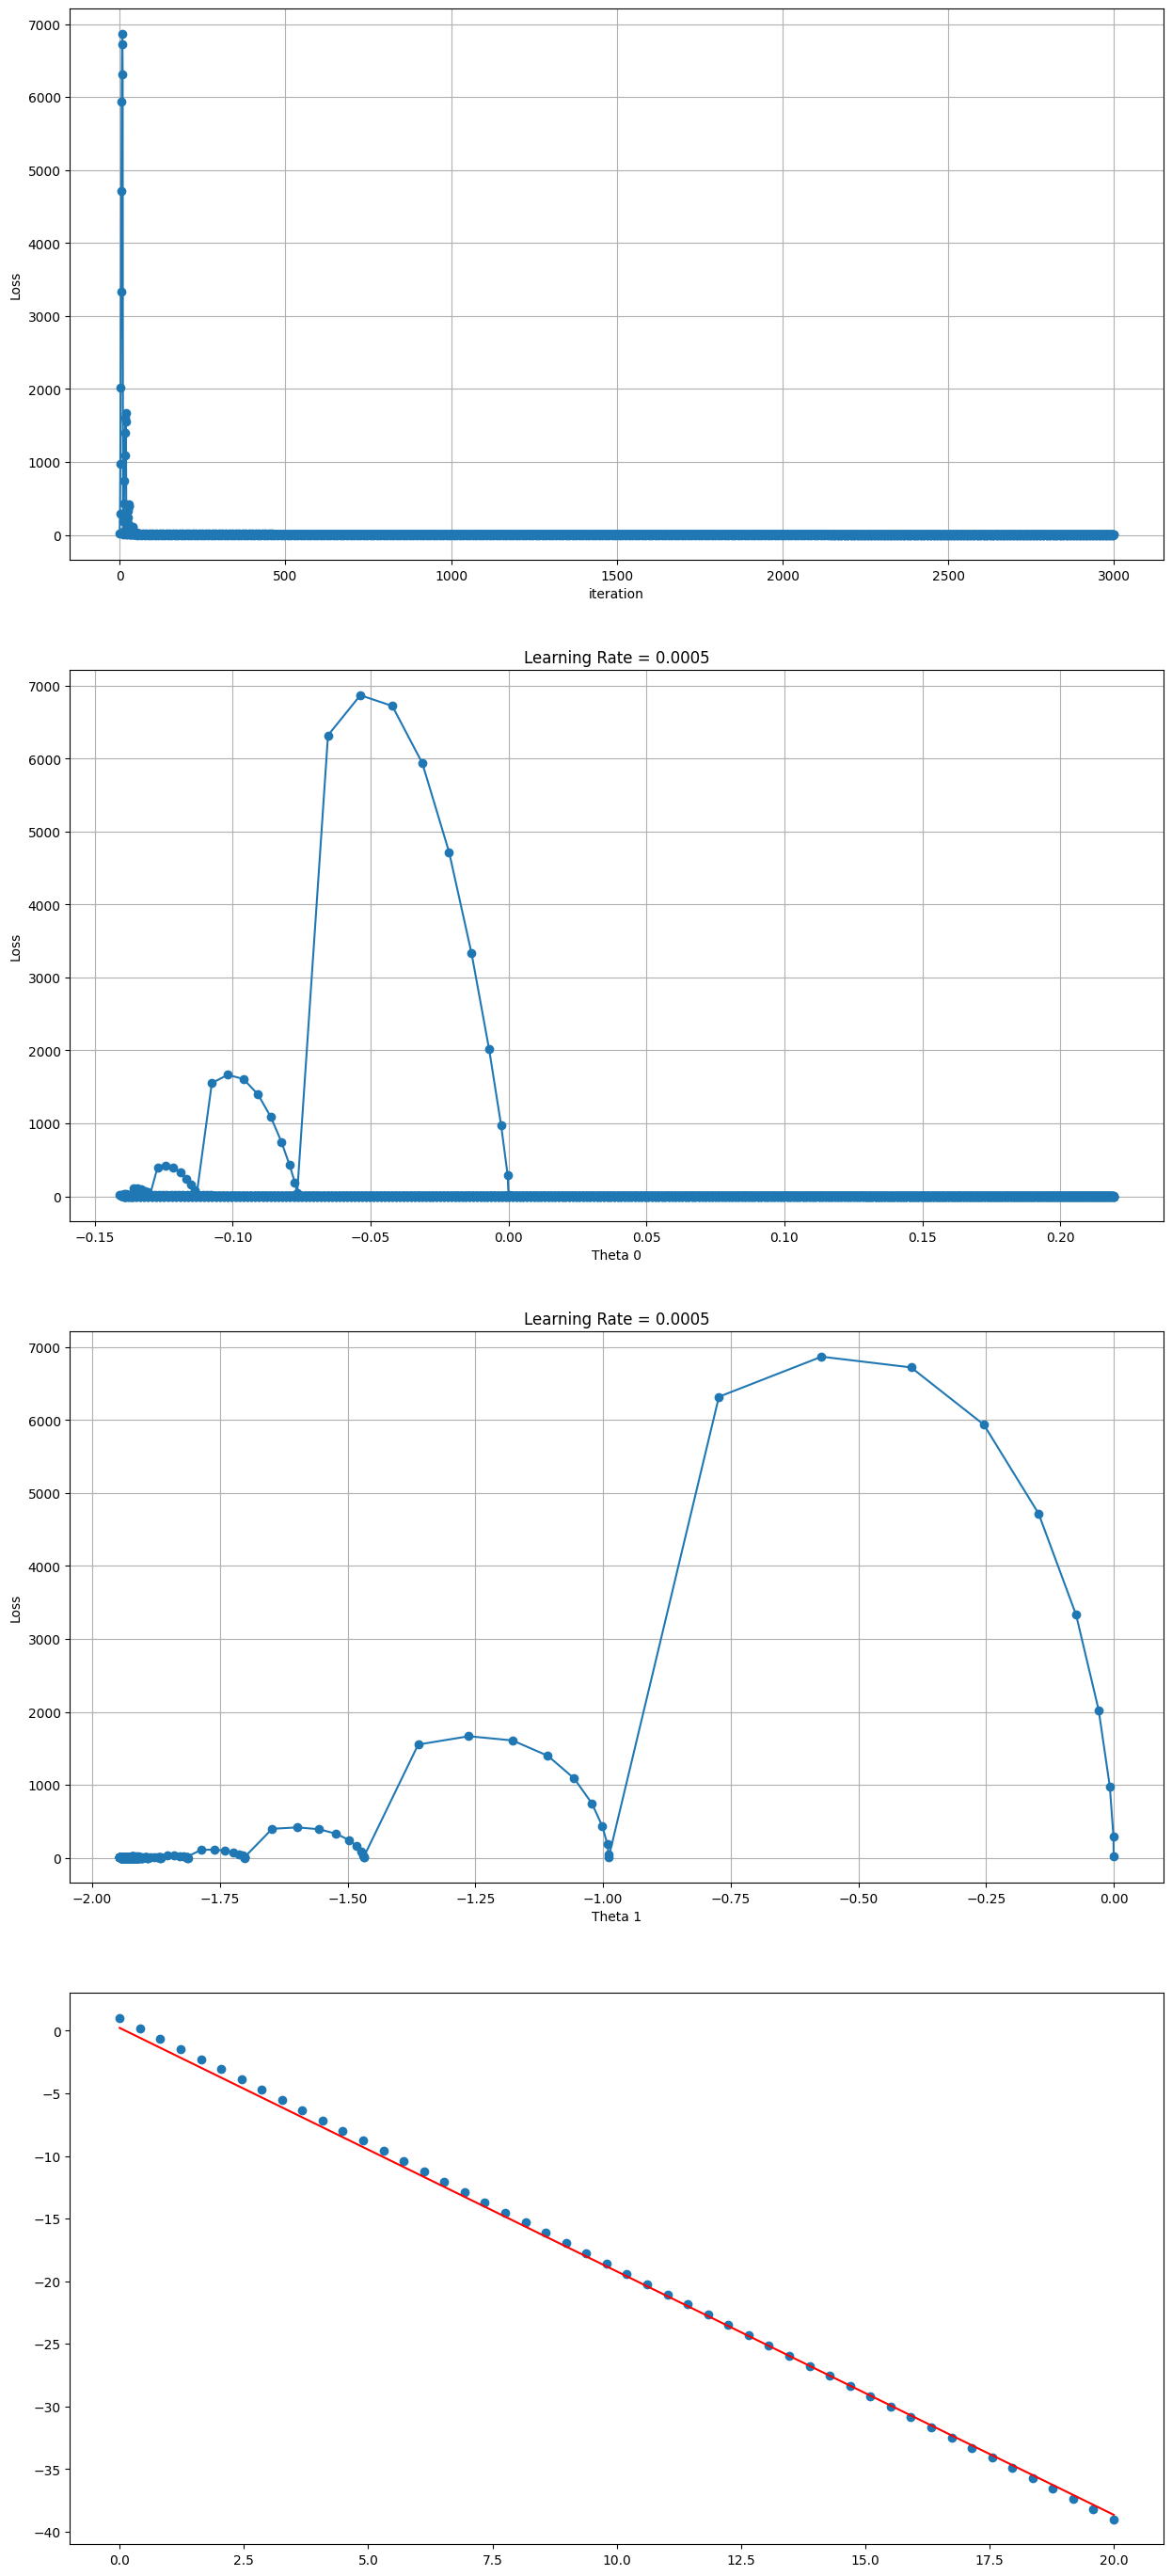

In [12]:
plt.figure(figsize=(15,35))

plt.subplot(411)
plt.plot(losses, marker='o')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.grid('True');

plt.subplot(412)
plt.plot(thetas_0, losses, marker='o')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Learning Rate = 0.0005')
plt.grid('True')

plt.subplot(413)
plt.plot(thetas_1, losses, marker='o')
plt.xlabel('Theta 1',)
plt.ylabel('Loss')
plt.title('Learning Rate = 0.0005')
plt.grid('True')

plt.subplot(414)
plt.scatter(X, y)
plt.plot(X, h_x, 'r');